In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage.io
from skimage import morphology
import imagecodecs
import pprint
import cv2
import json
import zipfile

from tqdm.notebook import tqdm
import os
from multiprocessing import Pool
import shutil

In [2]:
# Don't change this: constants
benjamin_path = '/media/benjamin/Seagate Expansion Drive/content/prostate-cancer-grade-assessment/'
maria_path = '/media/maria/2TB Monster driv/prostate-cancer-grade-assessment/'
options = ["avoid_white", "avoid_black", "use_mask_values"]

my_path = benjamin_path
MASKS = os.path.join(benjamin_path, 'train_label_masks/')

In [3]:
list_imgs = os.listdir(MASKS)
names = [fn[:-10] for fn in list_imgs if '_mask' in fn]

In [37]:
# 10h, launch at night
results = []
i = 0
for name in tqdm(names):
    i += 1
    slide_2 = skimage.io.MultiImage(os.path.join(my_path,'train_images/'+name+'.tiff'))[2][:,:,0]
    n_useful_px_lvl2 = (slide_2 != 255).sum()
    del(slide_2)
    slide_1 = skimage.io.MultiImage(os.path.join(my_path,'train_images/'+name+'.tiff'))[1][:,:,0]
    n_useful_px_lvl1 = (slide_1 != 255).sum()
    del(slide_1)
#     if n_useful_px_lvl1 < 36 * 256 * 256 * 8:
#         slide_0 = skimage.io.MultiImage(os.path.join(my_path,'train_images/'+name+'.tiff'))[0][:,:,0]
#         n_useful_px_lvl0 = (slide_0 != 255).sum()
#         del(slide_0)
#     else:
#         n_useful_px_lvl0 = n_useful_px_lvl1 * 16
    
    results.append({'name': name, 'lvl0':n_useful_px_lvl1*16, 'lvl1':n_useful_px_lvl1, 'lvl2':n_useful_px_lvl2})
    if i % 100 == 0:
        df = pd.DataFrame(results)
        df.to_csv('../data/n_non_white_pixels.csv', index=False)

In [6]:
slide_1 = skimage.io.MultiImage(os.path.join(my_path,'train_images/'+names[0]+'.tiff'))[1]

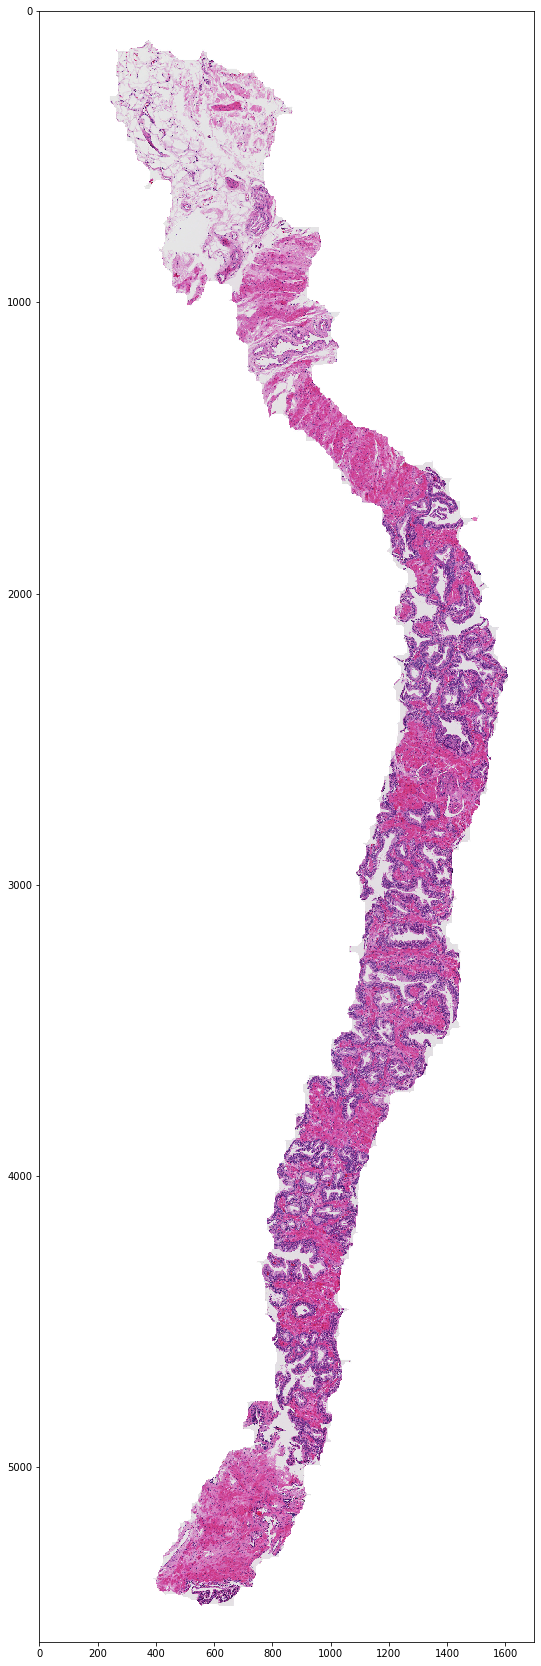

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(30,30))
ax.imshow(slide_1[700:6300, 600:2300], figure=fig)
plt.show()

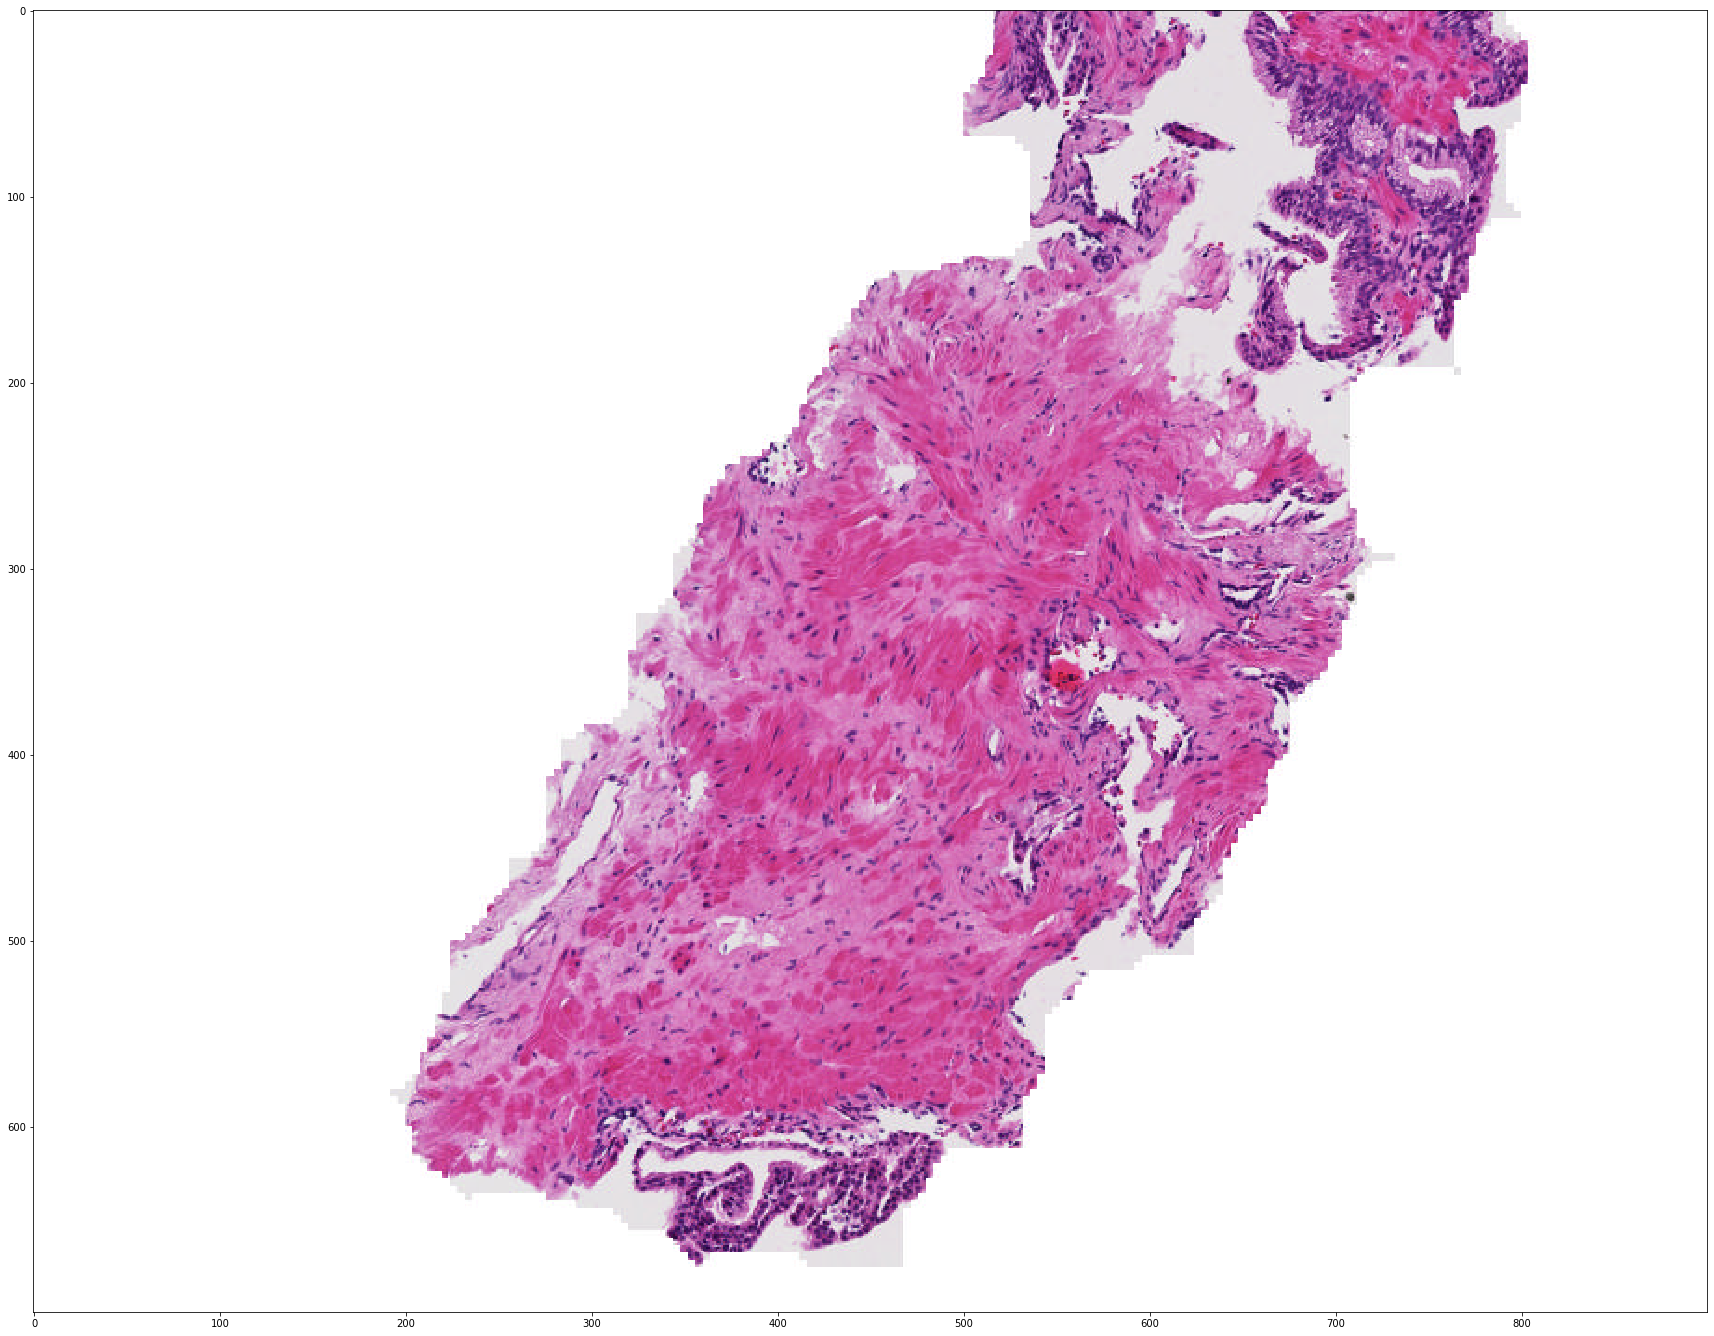

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(30,30))
ax.imshow(slide_1[5500:6200, 800:1700], figure=fig)
plt.show()